<a href="https://colab.research.google.com/github/krbo8o5/emotion_detection/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

# Define a function to extract labels from the filename
def extract_labels(filename):
    # Split the filename by "-"
    parts = filename.split("-")

    if len(parts) < 10:
        return None  # If the filename doesn't follow the convention, skip it

    # Mapping for labels
    modality_map = {'03': 'audio-only'}
    vocal_channel_map = {'01': 'speech', '02': 'non-speech'}
    emotion_map = {
        '01': 'boredom, sigh', '02': 'neutral, calm', '03': 'happy, laugh, gaggle',
        '04': 'sad, cry', '05': 'angry, grunt, frustration', '06': 'fearful, scream, panic',
        '07': 'disgust, dislike, contempt', '08': 'surprised, gasp, amazed', '09': 'excited',
        '10': 'pleasure', '11': 'pain, groan', '12': 'disappointment, disapproval', '13': 'breath'
    }
    intensity_map = {'01': 'normal', '02': 'high'}
    age_map = {'01': 'above 65', '02': '20-64', '03': 'under 20', '04': 'baby'}
    source_map = {'01': 'website', '02': 'YouTube', '03': 'movies'}
    language_map = {'01': 'Chinese', '02': 'English', '04': 'French'}

    # Extract the attributes
    modality = modality_map.get(parts[0], 'unknown')
    vocal_channel = vocal_channel_map.get(parts[1], 'unknown')
    emotion = emotion_map.get(parts[2], 'unknown')
    intensity = intensity_map.get(parts[3], 'unknown')
    statement = parts[4]
    actor = parts[5]
    actor_gender = 'male' if int(actor) % 2 == 0 else 'female'
    age = age_map.get(parts[6], 'unknown')
    source = source_map.get(parts[7], 'unknown')
    language = language_map.get(parts[8], 'unknown')

    # Check for noise or mixed voices (based on ending patterns)
    similarity = parts[9].split(".")[0]
    noise_level = "high noise environment" if similarity.endswith("77") else "clean"
    mixed_voices = "mixed voices" if similarity.endswith("66") else "single voice"

    return {
        'filename': filename,
        'modality': modality,
        'vocal_channel': vocal_channel,
        'emotion': emotion,
        'intensity': intensity,
        'statement': statement,
        'actor': actor,
        'actor_gender': actor_gender,
        'age': age,
        'source': source,
        'language': language,
        'noise_level': noise_level,
        'mixed_voices': mixed_voices
    }

# Path to the root directory containing subdirectories with audio files
root_directory = '/Users/arnavgoel/Desktop/mini project/ASVP-ESD-Update'  # Use the path where the audio files are stored in Colab

# List to store the labeled data
labeled_data = []

# Traverse the directory structure
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.wav'):  # Only process .wav files
            filepath = os.path.join(subdir, file)
            labels = extract_labels(file)
            if labels:
                labels['file_path'] = filepath  # Add full file path to the label info
                labeled_data.append(labels)

# Create a DataFrame from the labeled data
df = pd.DataFrame(labeled_data)

# Save the labeled data to a CSV file
output_csv = '/Users/arnavgoel/Desktop/mini project/labeled_audio_data.csv'
df.to_csv(output_csv, index=False)

In [ ]:
df.head()

,filename,modality,vocal_channel,emotion,intensity,statement,actor,actor_gender,age,source,language,noise_level,mixed_voices,file_path
0,03-01-04-01-02-16-03-03-01-01.wav,audio-only,speech,"sad, cry",normal,02,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...
1,03-02-04-01-01-16-03-03-01-34.wav,audio-only,non-speech,"sad, cry",normal,01,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...
2,03-01-04-01-02-16-03-03-01-03.wav,audio-only,speech,"sad, cry",normal,02,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...
3,03-01-04-01-01-16-03-03-01-02.wav,audio-only,speech,"sad, cry",normal,01,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...
4,03-02-04-01-02-16-03-03-01-34.wav,audio-only,non-speech,"sad, cry",normal,02,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...


In [ ]:
df.shape

(10859, 14)

In [ ]:
df.value_counts('vocal_channel')

vocal_channel
non-speech    8381
speech        2478
Name: count, dtype: int64

In [ ]:
emotion_mapping = {
    'sad, cry': 'Sad',
    'happy, laugh, gaggle': 'Happy',
    'surprised, gasp, amazed': 'Surprise',
    'fearful, scream, panic': 'Fear',
    'pain, groan': 'Pain',
    'disgust, dislike, contempt': 'Disgust',
    'boredom, sigh': 'Boredom',
    'angry, grunt, frustration': 'Anger',
    'pleasure': 'Pleasure',
    'neutral, calm': 'Neutral',
    'breath': 'Breath',
    'excited': 'Excitement',
    'disappointment, disapproval': 'Disappointment'
}

# Assuming 'emotion' is the column in your DataFrame
df['merged_emotion'] = df['emotion'].replace(emotion_mapping)

# Display the updated DataFrame
print(df[['emotion', 'merged_emotion']].sample(10))

                          emotion  merged_emotion
4288   disgust, dislike, contempt         Disgust
7307      surprised, gasp, amazed        Surprise
4881         happy, laugh, gaggle           Happy
7629                  pain, groan            Pain
7080                     sad, cry             Sad
9057                neutral, calm         Neutral
4919  disappointment, disapproval  Disappointment
2475                     sad, cry             Sad
1004                     sad, cry             Sad
8352         happy, laugh, gaggle           Happy


In [ ]:
ns_df = df[df['vocal_channel'] == 'non-speech']

In [ ]:
ns_df.head()

,filename,modality,vocal_channel,emotion,intensity,statement,actor,actor_gender,age,source,language,noise_level,mixed_voices,file_path,merged_emotion
1,03-02-04-01-01-16-03-03-01-34.wav,audio-only,non-speech,"sad, cry",normal,01,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad
4,03-02-04-01-02-16-03-03-01-34.wav,audio-only,non-speech,"sad, cry",normal,02,16,male,under 20,movies,Chinese,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad
5,03-02-04-01-123-150-04-01-00-14-03.wav,audio-only,non-speech,"sad, cry",normal,123,150,male,baby,website,unknown,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad
6,03-02-03-01-164-150-04-01-00-14-01.wav,audio-only,non-speech,"happy, laugh, gaggle",normal,164,150,male,baby,website,unknown,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Happy
7,03-02-04-01-60-150-04-01-00-14-01.wav,audio-only,non-speech,"sad, cry",normal,60,150,male,baby,website,unknown,clean,single voice,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad


In [ ]:
ns_df.shape

(8381, 15)

In [ ]:
ns_df.value_counts('merged_emotion')

merged_emotion
Sad               2108
Happy             1146
Surprise           998
Fear               924
Pain               767
Disgust            660
Boredom            436
Anger              383
Pleasure           324
Neutral            264
Breath             171
Excitement         128
Disappointment      72
Name: count, dtype: int64

In [ ]:
!pip3 install ipython

In [ ]:
!pip3 install librosa

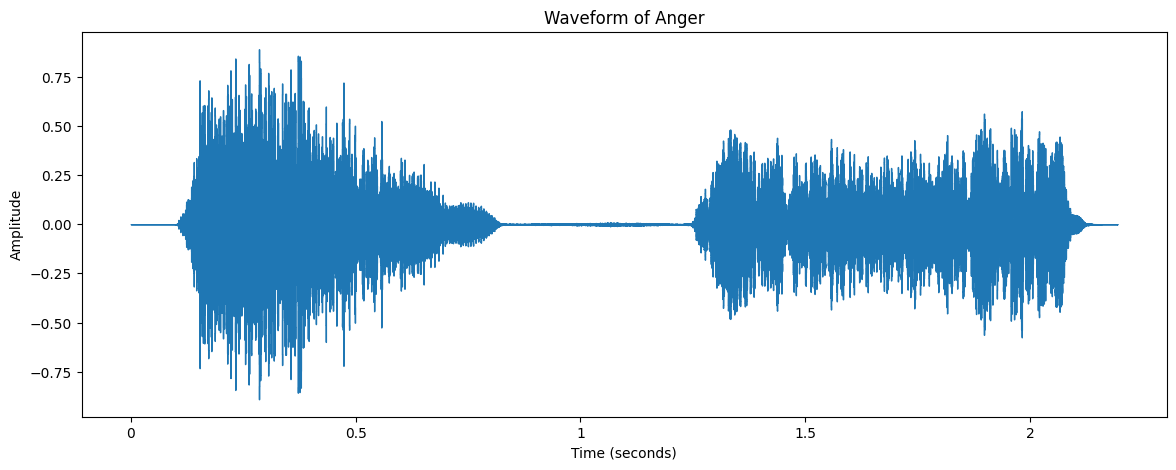

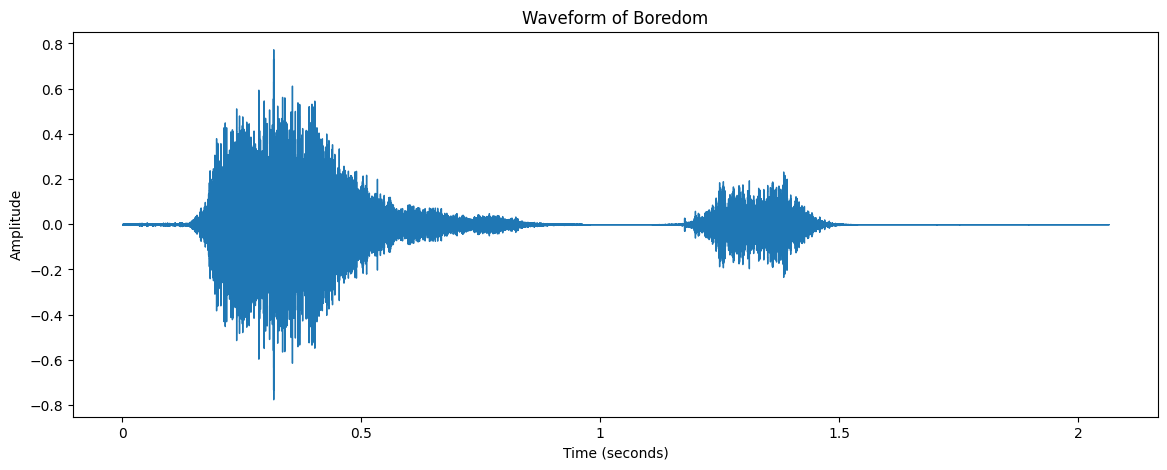

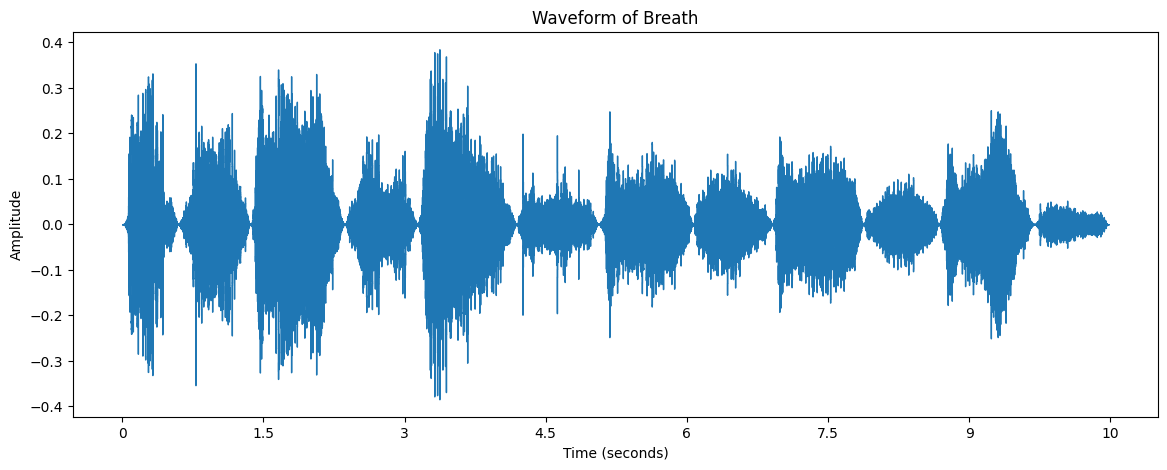

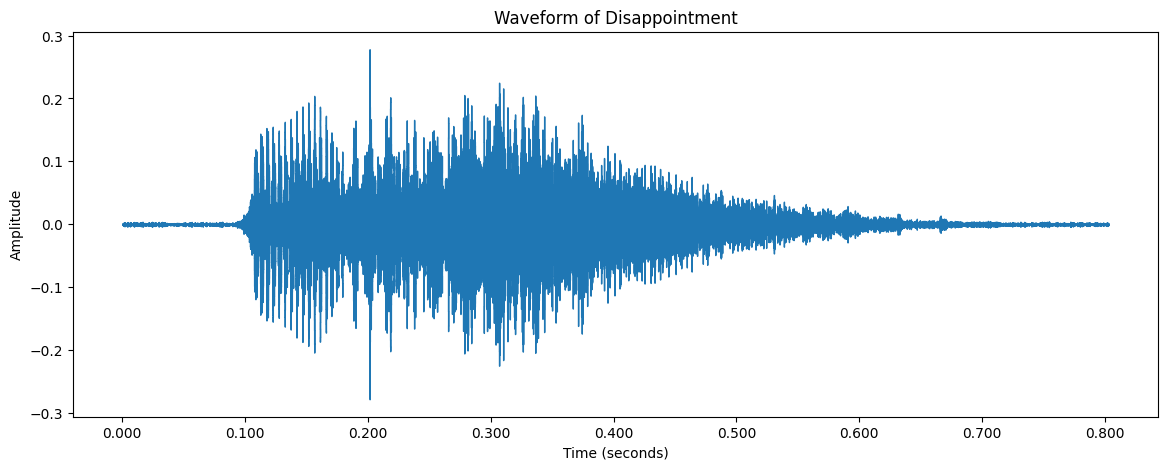

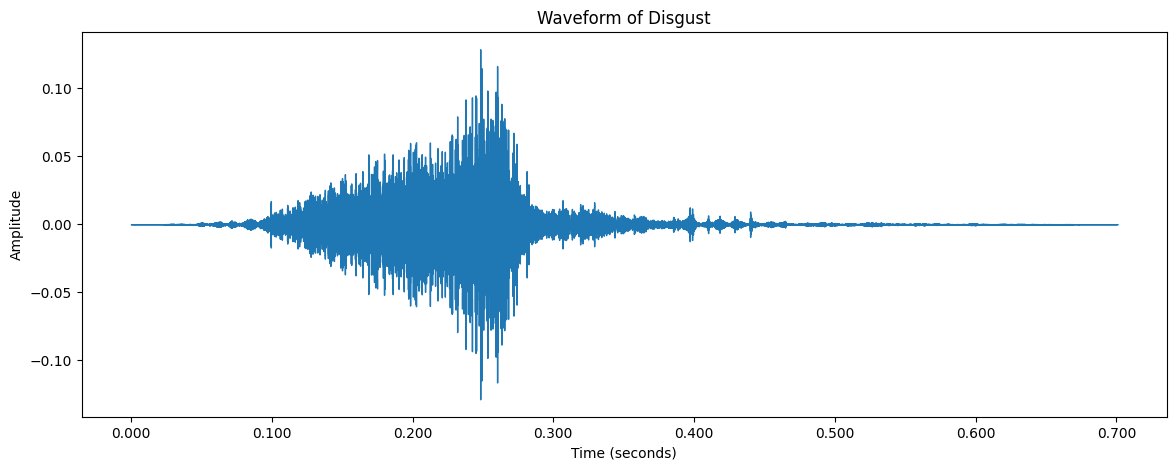

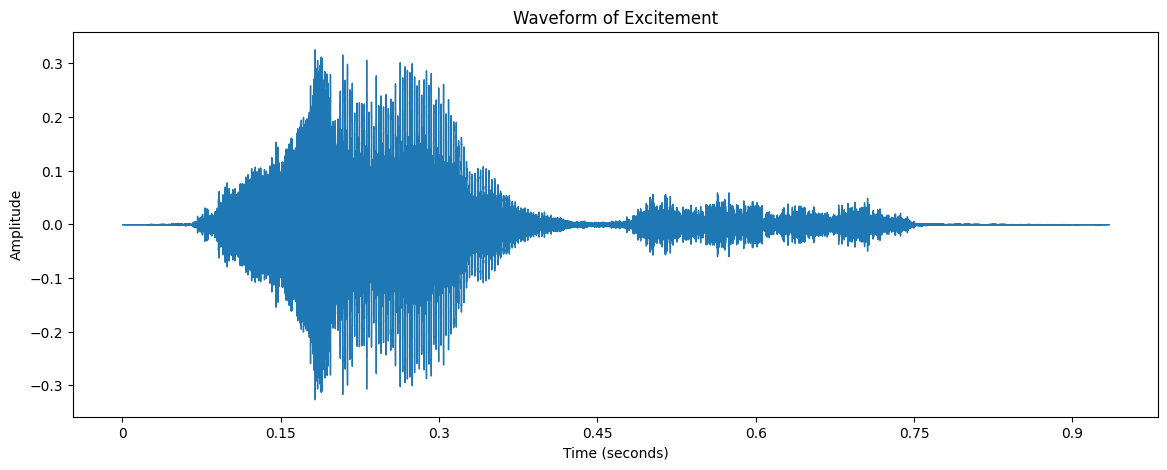

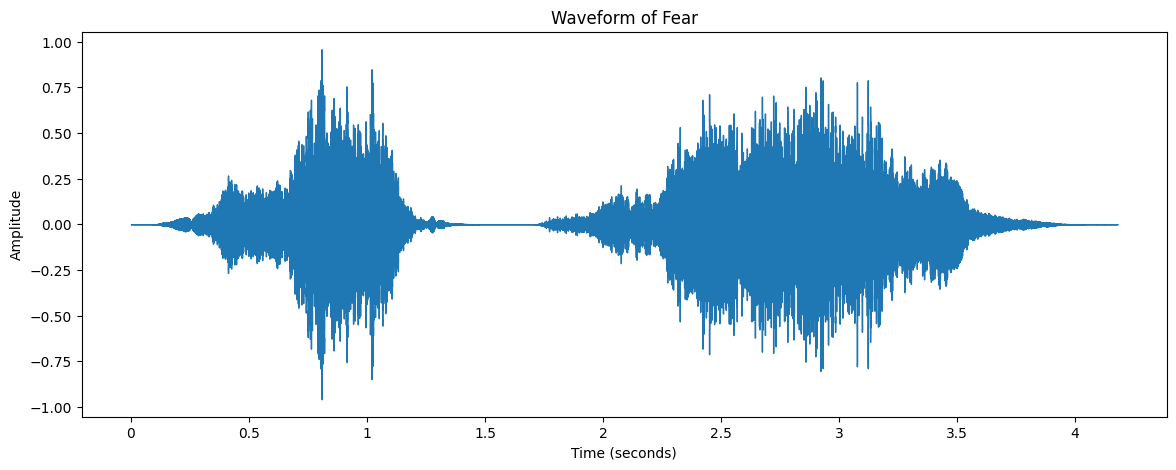

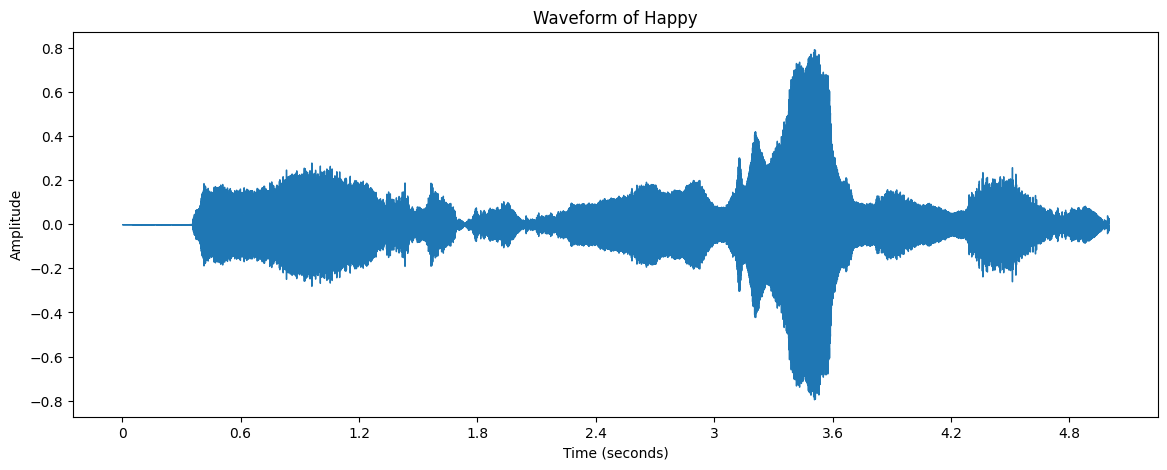

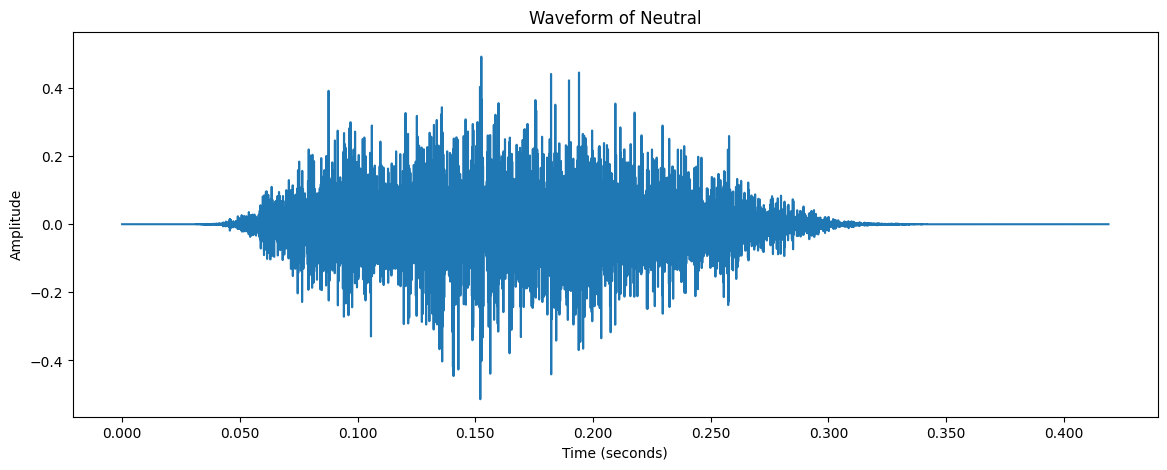

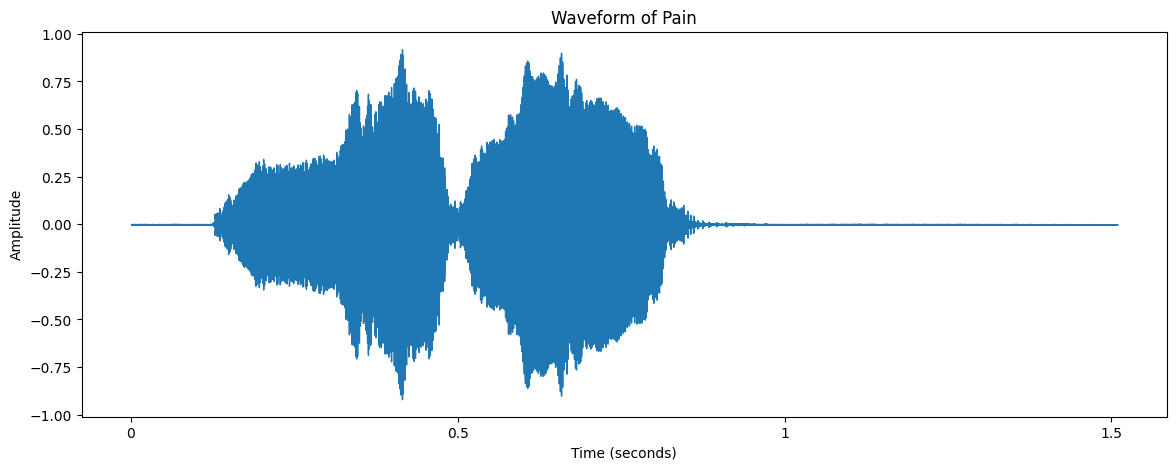

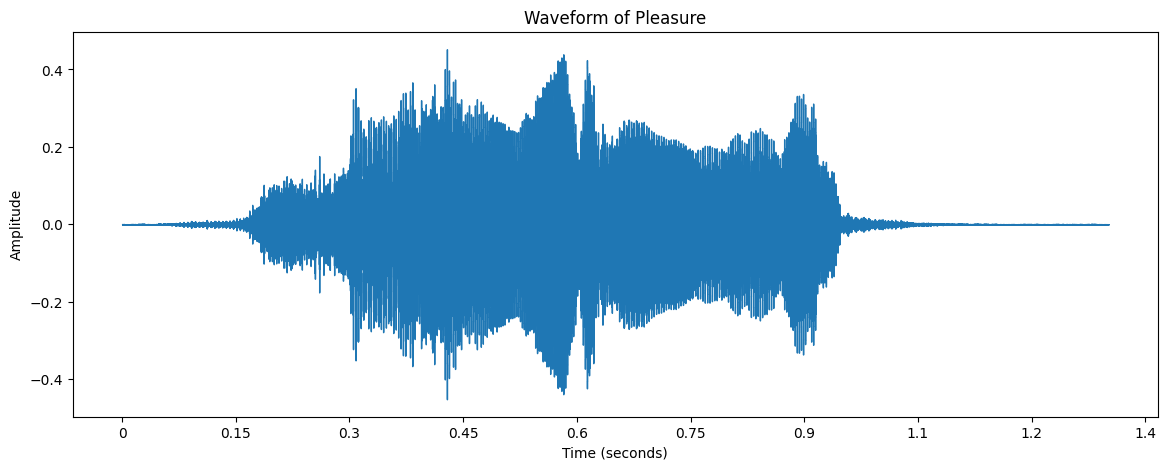

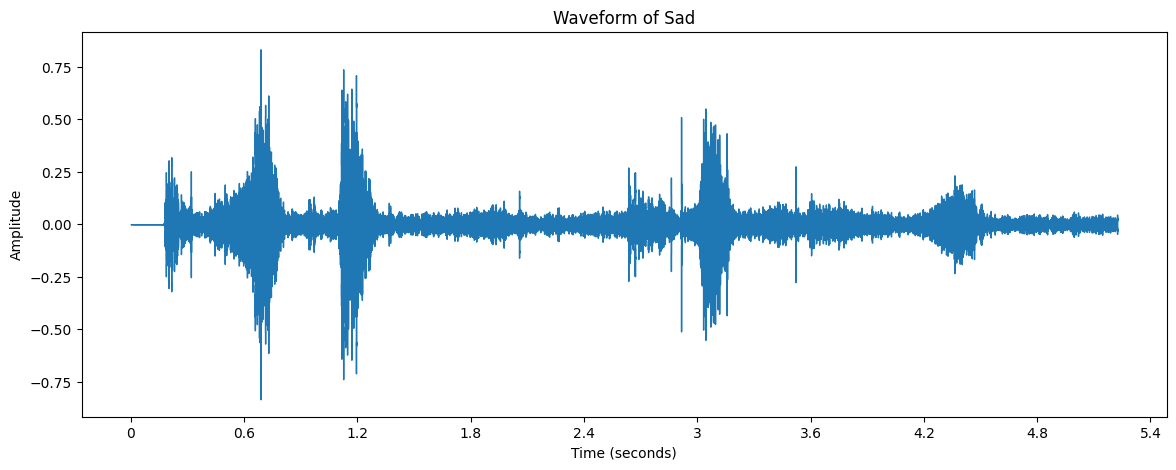

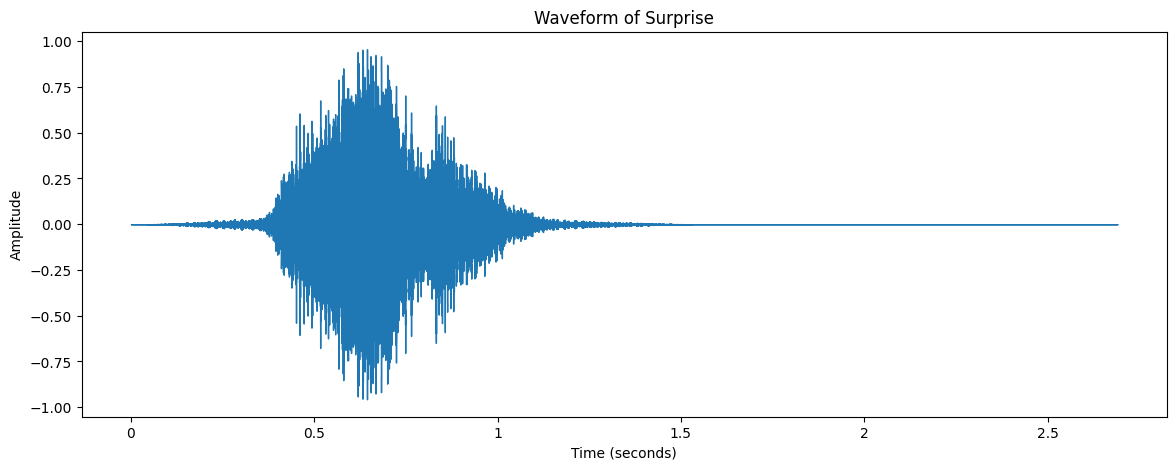

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt


emotion_groups = ns_df.groupby('merged_emotion').first().reset_index()

for i, row in emotion_groups.iterrows():
    audio_file_path = row['file_path']
    emotion = row['merged_emotion']

    audio_data, sampling_rate = librosa.load(audio_file_path, sr=None)

    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio_data, sr=sampling_rate)
    plt.title(f"Waveform of {emotion}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()
    display(ipd.Audio(audio_file_path))

In [ ]:
import numpy as np
import pandas as pd

def extract_audio_features(file_path):
    audio_data, sampling_rate = librosa.load(file_path, sr=None)

    mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)
    zcr = librosa.feature.zero_crossing_rate(audio_data)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sampling_rate)
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sampling_rate)

    return {
        'mfcc': mfccs,
        'zcr': zcr,
        'mel_spectrogram': mel_spectrogram,
        'chroma': chroma
    }

feature_list = []

for index, row in ns_df.iterrows():
    audio_file_path = row['file_path']
    emotion = row['emotion']

    features = extract_audio_features(audio_file_path)

    feature_list.append({
        'file_path': audio_file_path,
        'emotion': emotion,
        'mfcc': features['mfcc'],
        'zcr': features['zcr'],
        'mel_spectrogram': features['mel_spectrogram'],
        'chroma': features['chroma']
    })

features_df = pd.DataFrame(feature_list)

features_df.head()

NameError: name 'ns_df' is not defined

In [ ]:
features_df=pd.read_csv('extracted_features.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'extracted_features.csv'

In [ ]:
csv_file_path = 'extracted_features.csv'
features_df.to_csv(csv_file_path, index=False)

NameError: name 'features_df' is not defined

In [ ]:
emotion_mapping = {
    'sad, cry': 'Sad',
    'happy, laugh, gaggle': 'Happy',
    'surprised, gasp, amazed': 'Surprise',
    'fearful, scream, panic': 'Fear',
    'pain, groan': 'Pain',
    'disgust, dislike, contempt': 'Disgust',
    'boredom, sigh': 'Boredom',
    'angry, grunt, frustration': 'Anger',
    'pleasure': 'Pleasure',
    'neutral, calm': 'Neutral',
    'breath': 'Breath',
    'excited': 'Excitement',
    'disappointment, disapproval': 'Disappointment'
}

# Assuming 'emotion' is the column in your DataFrame
features_df['emotion'] = features_df['emotion'].replace(emotion_mapping)

In [ ]:
features_df.head()

,file_path,emotion,mfcc,zcr,mel_spectrogram,chroma
0,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad,[[-6.83576721e+02 -6.83576721e+02 -6.83576721e...,[[0. 0. 0. 0. ...,[[0.0000000e+00 0.0000000e+00 0.0000000e+00 .....,[[0. 0. 0. ... 0.62258...
1,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad,[[-7.09233093e+02 -7.09233093e+02 -7.09233093e...,[[0. 0. 0. 0. ...,[[0.00000000e+00 0.00000000e+00 0.00000000e+00...,[[0. 0. 0. 0. ...
2,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad,[[-1.92303955e+02 -2.13234192e+02 -2.47521637e...,[[0.11572266 0.17919922 0.24707031 0.23486328 ...,[[3.50484834e-03 6.61577890e-03 8.86307377e-03...,[[0.26958284 0.13200775 0.1129097 ... 0.00661...
3,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Happy,[[-5.0064407e+02 -5.0064407e+02 -5.0064407e+02...,[[0.00292969 0.00585938 0.01464844 0.01855469 ...,[[2.7251118e-13 2.8784308e-10 2.1155064e-09 .....,[[7.8383940e-01 8.1936157e-01 8.0221158e-01 .....
4,/Users/arnavgoel/Desktop/mini project/ASVP-ESD...,Sad,[[-594.992 -594.992 -589.95294 ... -...,[[0. 0.01513672 0.05175781 0.08349609 ...,[[0.00000000e+00 8.21511845e-14 3.34794592e-08...,[[0. 0.7223064 0.12214929 ... 0.11315...


In [ ]:
features_df.shape

(8381, 6)

In [ ]:
import librosa
import numpy as np

def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.mean(axis=1)

def extract_zcr(file_path):
    y, sr = librosa.load(file_path, sr=None)
    zcr = librosa.feature.zero_crossing_rate(y)
    return zcr.mean()

def extract_mel(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    return mel.mean(axis=1)  # Mean value

def extract_chroma(file_path):
    y, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma.mean(axis=1)


In [ ]:
import pandas as pd

mfcc_list = []
zcr_list = []
mel_list = []
chroma_list = []

for index, row in features_df.iterrows():
    file_path = row['file_path']

    mfcc = extract_mfcc(file_path)
    zcr = extract_zcr(file_path)
    mel = extract_mel(file_path)
    chroma = extract_chroma(file_path)

    mfcc_list.append(mfcc)
    zcr_list.append(zcr)
    mel_list.append(mel)
    chroma_list.append(chroma)

mfcc_df = pd.DataFrame(mfcc_list, columns=[f'mfcc_{i}' for i in range(len(mfcc_list[0]))])
zcr_df = pd.DataFrame(zcr_list, columns=['zcr'])
mel_df = pd.DataFrame(mel_list, columns=[f'mel_{i}' for i in range(len(mel_list[0]))])
chroma_df = pd.DataFrame(chroma_list, columns=[f'chroma_{i}' for i in range(len(chroma_list[0]))])

features_df_expanded = pd.concat([features_df, mfcc_df, zcr_df, mel_df, chroma_df], axis=1)

print(features_df_expanded.head())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


                                           file_path emotion  \
0  /Users/arnavgoel/Desktop/mini project/ASVP-ESD...     Sad   
1  /Users/arnavgoel/Desktop/mini project/ASVP-ESD...     Sad   
2  /Users/arnavgoel/Desktop/mini project/ASVP-ESD...     Sad   
3  /Users/arnavgoel/Desktop/mini project/ASVP-ESD...   Happy   
4  /Users/arnavgoel/Desktop/mini project/ASVP-ESD...     Sad   

                                                mfcc  \
0  [[-6.83576721e+02 -6.83576721e+02 -6.83576721e...   
1  [[-7.09233093e+02 -7.09233093e+02 -7.09233093e...   
2  [[-1.92303955e+02 -2.13234192e+02 -2.47521637e...   
3  [[-5.0064407e+02 -5.0064407e+02 -5.0064407e+02...   
4  [[-594.992     -594.992     -589.95294   ... -...   

                                                 zcr  \
0  [[0.         0.         0.         0.         ...   
1  [[0.         0.         0.         0.         ...   
2  [[0.11572266 0.17919922 0.24707031 0.23486328 ...   
3  [[0.00292969 0.00585938 0.01464844 0.01855469 ...  

In [ ]:
csv_file_path = 'expanded_features.csv'
features_df_expanded.to_csv(csv_file_path, index=False)

NameError: name 'features_df_expanded' is not defined

In [ ]:
features_df_expanded=pd.read_csv('expanded_features.csv')

In [ ]:
features_df_expanded.shape

(8381, 160)

In [ ]:
features_df_expanded.value_counts('emotion')

,count
emotion,
Sad,2108
Happy,1146
Surprise,998
Fear,924
Pain,767
Disgust,660
Boredom,436
Anger,383
Pleasure,324


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define a function to plot MFCC, Mel Spectrogram, and Chromagram for a single audio file
def plot_features(file_path, emotion, ax_mfcc, ax_mel, ax_chroma):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Extract Mel Spectrogram
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Extract Chromagram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Plot MFCC
    librosa.display.specshow(mfcc, x_axis='time', ax=ax_mfcc)
    ax_mfcc.set_title(f'MFCC - {emotion}')

    # Plot Mel Spectrogram
    librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, ax=ax_mel)
    ax_mel.set_title(f'Mel Spectrogram - {emotion}')

    # Plot Chromagram
    librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=ax_chroma)
    ax_chroma.set_title(f'Chromagram - {emotion}')

# Get a list of unique emotions
unique_emotions = features_df['emotion'].unique()

# Create subplots: 3 columns for MFCC, Mel Spectrogram, and Chromagram, 1 row per emotion
fig, axes = plt.subplots(len(unique_emotions), 3, figsize=(20, len(unique_emotions) * 3))

# Loop through each unique emotion and plot MFCC, Mel Spectrogram, and Chromagram
for i, emotion in enumerate(unique_emotions):
    # Select the first file for each emotion
    file_path = features_df[features_df['emotion'] == emotion]['file_path'].iloc[2]

    plot_features(file_path, emotion, ax_mfcc=axes[i, 0], ax_mel=axes[i, 1], ax_chroma=axes[i, 2])

plt.tight_layout()
plt.show()


NameError: name 'features_df' is not defined

In [ ]:
features_df_expanded = features_df_expanded.drop(['mfcc', 'zcr', 'mel_spectrogram', 'chroma'], axis=1)

In [ ]:
X = features_df_expanded.drop(columns=['emotion', 'file_path'])
y = features_df_expanded['emotion']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = features_df_expanded.drop(columns=['emotion', 'file_path'])
y = features_df_expanded['emotion']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled
csv_file_path = 'balanced_extracted_features.csv'
df_resampled.to_csv(csv_file_path, index=False)
df_resampled.head()

<ipython-input-43-121fae523799>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,-228.02501,147.842210,-70.747215,68.790060,-28.227379,32.313810,-10.003086,-7.403256,-0.674906,-5.756487,...,0.722635,0.618910,0.618261,0.558508,0.537721,0.559678,0.600051,0.609786,0.575064,Sad
1,-319.90155,167.701140,-48.286850,46.100620,-14.900600,22.293093,1.392822,-13.227706,3.483710,2.841111,...,0.592704,0.583074,0.567646,0.541157,0.402435,0.430338,0.522751,0.557799,0.499159,Sad
2,-393.52457,57.013573,-33.018734,33.840805,-56.194850,16.108864,-26.557451,4.584624,3.596937,-4.936513,...,0.196284,0.172487,0.153615,0.156664,0.223836,0.336268,0.380381,0.319510,0.356914,Sad
3,-271.50842,-10.220695,-0.593648,-21.216953,-36.400450,-3.494889,1.195620,-3.094382,-6.202547,-1.421871,...,0.145059,0.110400,0.163052,0.304374,0.469874,0.508017,0.389519,0.270765,0.137417,Happy
4,-209.49080,81.121990,-71.974530,49.814130,-59.801914,13.942583,-35.307404,20.319042,2.352706,-5.890118,...,0.293354,0.222501,0.162873,0.162087,0.196924,0.248810,0.256410,0.280539,0.197348,Sad


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

Accuracy of KNeighborsClassifier: 70.84473636197774
Classification Report:
                 precision    recall  f1-score   support

         Anger       0.62      0.80      0.70       435
       Boredom       0.62      0.78      0.69       411
        Breath       0.76      0.98      0.86       436
Disappointment       0.88      1.00      0.94       438
       Disgust       0.55      0.56      0.56       417
    Excitement       0.86      1.00      0.92       409
          Fear       0.75      0.62      0.68       398
         Happy       0.55      0.43      0.48       449
       Neutral       0.73      0.88      0.80       418
          Pain       0.55      0.43      0.48       401
      Pleasure       0.75      0.83      0.79       431
           Sad       0.84      0.59      0.70       406
      Surprise       0.66      0.30      0.41       432

      accuracy                           0.71      5481
     macro avg       0.70      0.71      0.69      5481
  weighted avg       0.70 

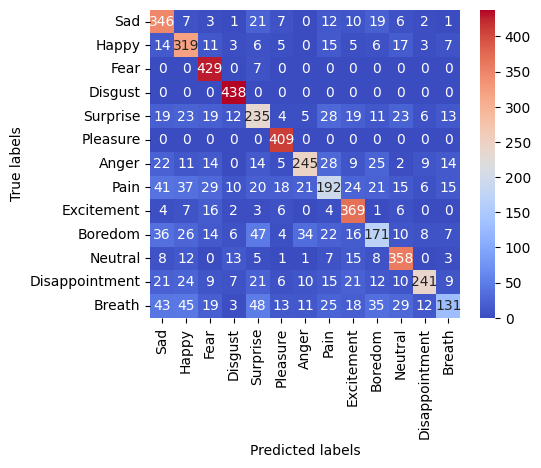

In [ ]:
#KNN
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
knc = KNeighborsClassifier(n_neighbors=8)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(f"Accuracy of KNeighborsClassifier: {accuracy_score(y_test,y_pred)*100}")
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)
conf_matrix_1 = confusion_matrix(y_test, y_pred)
label_names = ['Sad', 'Happy', 'Fear', 'Disgust', 'Surprise', 'Pleasure', 'Anger',
       'Pain', 'Excitement', 'Boredom', 'Neutral', 'Disappointment',
       'Breath']
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_1, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of RandomForestClassifier: 95.85841999635103
Classification Report:
                 precision    recall  f1-score   support

         Anger       0.98      0.99      0.99       435
       Boredom       0.97      0.99      0.98       411
        Breath       1.00      1.00      1.00       436
Disappointment       1.00      1.00      1.00       438
       Disgust       0.95      0.99      0.97       417
    Excitement       1.00      1.00      1.00       409
          Fear       0.92      0.94      0.93       398
         Happy       0.87      0.85      0.86       449
       Neutral       0.99      1.00      1.00       418
          Pain       0.96      0.95      0.95       401
      Pleasure       0.98      1.00      0.99       431
           Sad       0.92      0.85      0.88       406
      Surprise       0.92      0.91      0.92       432

      accuracy                           0.96      5481
     macro avg       0.96      0.96      0.96      5481
  weighted avg       0.9

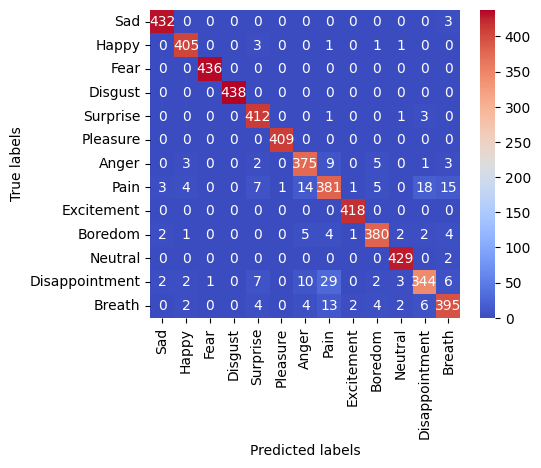

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=120, random_state = 110)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy of RandomForestClassifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Sad', 'Happy', 'Fear', 'Disgust', 'Surprise', 'Pleasure', 'Anger',
       'Pain', 'Excitement', 'Boredom', 'Neutral', 'Disappointment',
       'Breath']

conf_matrix_2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_2, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of MLP Classifier: 75.26%
Classification Report for MLP Classifier:
                 precision    recall  f1-score   support

         Anger       0.74      0.81      0.78       435
       Boredom       0.60      0.78      0.68       411
        Breath       0.87      0.97      0.92       436
Disappointment       0.92      0.99      0.95       438
       Disgust       0.73      0.52      0.61       417
    Excitement       0.96      0.99      0.97       409
          Fear       0.79      0.75      0.77       398
         Happy       0.76      0.44      0.55       449
       Neutral       0.72      0.80      0.75       418
          Pain       0.74      0.56      0.64       401
      Pleasure       0.77      0.81      0.79       431
           Sad       0.66      0.68      0.67       406
      Surprise       0.57      0.67      0.62       432

      accuracy                           0.75      5481
     macro avg       0.76      0.75      0.75      5481
  weighted avg       0.7

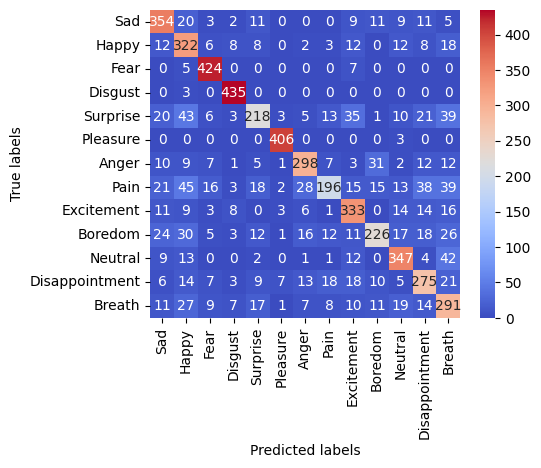

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
mlp_classifier = MLPClassifier(random_state=30)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP Classifier: {accuracy_mlp * 100:.2f}%")

report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report for MLP Classifier:\n", report_mlp)
label_names = ['Sad', 'Happy', 'Fear', 'Disgust', 'Surprise', 'Pleasure', 'Anger',
       'Pain', 'Excitement', 'Boredom', 'Neutral', 'Disappointment',
       'Breath']
conf_matrix_3 = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_3, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**Boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

features_df_expanded = pd.read_csv('/content/expanded_features.csv')


In [ ]:
features_df_expanded = features_df_expanded.drop(['mfcc', 'zcr', 'mel_spectrogram', 'chroma'], axis=1)

In [ ]:
features_df_expanded.columns

Index(['file_path', 'emotion', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3',
       'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       ...
       'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
       'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11'],
      dtype='object', length=156)

In [ ]:
X = features_df_expanded.drop(['file_path', 'emotion'], axis=1)
y = features_df_expanded['emotion']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = features_df_expanded.drop(columns=['emotion', 'file_path'])
y = features_df_expanded['emotion']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled
csv_file_path = 'balanced_extracted_features.csv'
df_resampled.to_csv(csv_file_path, index=False)
df_resampled.head()

<ipython-input-10-121fae523799>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,-228.02501,147.842210,-70.747215,68.790060,-28.227379,32.313810,-10.003086,-7.403256,-0.674906,-5.756487,...,0.722635,0.618910,0.618261,0.558508,0.537721,0.559678,0.600051,0.609786,0.575064,Sad
1,-319.90155,167.701140,-48.286850,46.100620,-14.900600,22.293093,1.392822,-13.227706,3.483710,2.841111,...,0.592704,0.583074,0.567646,0.541157,0.402435,0.430338,0.522751,0.557799,0.499159,Sad
2,-393.52457,57.013573,-33.018734,33.840805,-56.194850,16.108864,-26.557451,4.584624,3.596937,-4.936513,...,0.196284,0.172487,0.153615,0.156664,0.223836,0.336268,0.380381,0.319510,0.356914,Sad
3,-271.50842,-10.220695,-0.593648,-21.216953,-36.400450,-3.494889,1.195620,-3.094382,-6.202547,-1.421871,...,0.145059,0.110400,0.163052,0.304374,0.469874,0.508017,0.389519,0.270765,0.137417,Happy
4,-209.49080,81.121990,-71.974530,49.814130,-59.801914,13.942583,-35.307404,20.319042,2.352706,-5.890118,...,0.293354,0.222501,0.162873,0.162087,0.196924,0.248810,0.256410,0.280539,0.197348,Sad


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer

# # Impute missing values in X_resampled
# imputer = SimpleImputer(strategy="mean")  # You can choose 'median' or 'most_frequent'
# X_resampled_imputed = imputer.fit_transform(X_resampled)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X_resampled_imputed, y_resampled, test_size=0.2, random_state=42
# )

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8038679073161832
                precision    recall  f1-score   support

         Anger       0.77      0.80      0.79       435
       Boredom       0.78      0.82      0.80       411
        Breath       0.93      0.97      0.95       436
Disappointment       0.98      1.00      0.99       438
       Disgust       0.72      0.71      0.72       417
    Excitement       0.93      0.99      0.96       409
          Fear       0.81      0.79      0.80       398
         Happy       0.63      0.67      0.65       449
       Neutral       0.85      0.90      0.87       418
          Pain       0.65      0.57      0.61       401
      Pleasure       0.81      0.85      0.83       431
           Sad       0.81      0.76      0.78       406
      Surprise       0.75      0.63      0.68       432

      accuracy                           0.80      5481
     macro avg       0.80      0.80      0.80      5481
  weighted avg       0.80      0.80      0.80      5481

Gradient Boosting Accuracy: 0.8038679073161832

Classification Report:
                precision    recall  f1-score   support

         Anger       0.77      0.80      0.79       435
       Boredom       0.78      0.82      0.80       411
        Breath       0.93      0.97      0.95       436
Disappointment       0.98      1.00      0.99       438
       Disgust       0.72      0.71      0.72       417
    Excitement       0.93      0.99      0.96       409
          Fear       0.81      0.79      0.80       398
         Happy       0.63      0.67      0.65       449
       Neutral       0.85      0.90      0.87       418
          Pain       0.65      0.57      0.61       401
      Pleasure       0.81      0.85      0.83       431
           Sad       0.81      0.76      0.78       406
      Surprise       0.75      0.63      0.68       432

      accuracy                           0.80      5481
     macro avg       0.80      0.80      0.80      5481
  weighted avg       0.80      

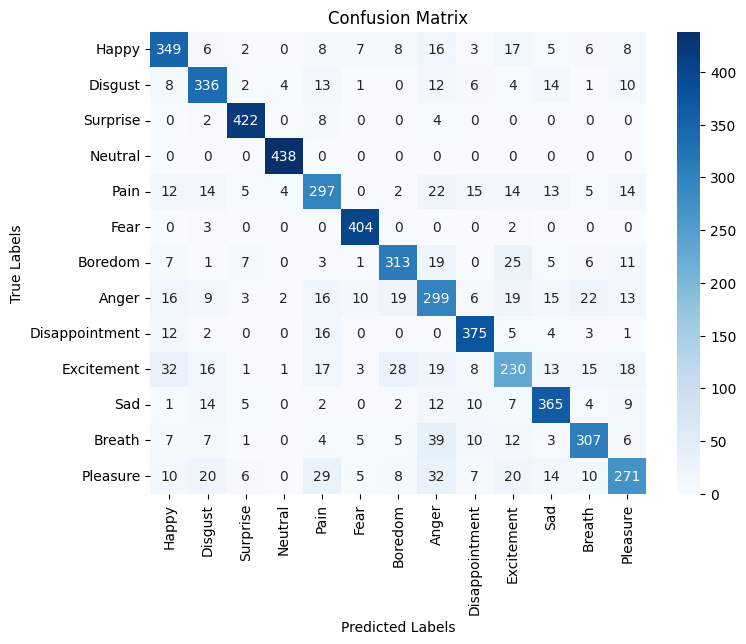

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gb)
class_report = classification_report(y_test, y_pred_gb)
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode target labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit model on training data
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9627805145046524
                precision    recall  f1-score   support

         Anger       0.99      0.99      0.99       435
       Boredom       0.96      0.98      0.97       411
        Breath       1.00      1.00      1.00       436
Disappointment       1.00      1.00      1.00       438
       Disgust       0.95      0.98      0.97       417
    Excitement       1.00      1.00      1.00       409
          Fear       0.93      0.94      0.94       398
         Happy       0.90      0.86      0.88       449
       Neutral       0.98      1.00      0.99       418
          Pain       0.96      0.95      0.96       401
      Pleasure       0.97      0.99      0.98       431
           Sad       0.94      0.88      0.91       406
      Surprise       0.93      0.93      0.93       432

      accuracy                           0.96      5481
     macro avg       0.96      0.96      0.96      5481
  weighted avg       0.96      0.96      0.96      5481



XGBoost Accuracy: 0.9627805145046524

Confusion Matrix:
[[432   0   0   0   0   0   0   0   3   0   0   0   0]
 [  0 403   0   0   1   0   1   0   2   1   1   0   2]
 [  0   0 436   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 438   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 410   0   0   4   0   0   0   3   0]
 [  0   0   0   0   0 409   0   0   0   0   0   0   0]
 [  1   3   0   0   1   0 376   1   0   8   0   0   8]
 [  3   6   2   0   3   1  15 386   2   1   3  15  12]
 [  0   0   0   0   0   0   0   0 418   0   0   0   0]
 [  1   2   0   0   5   0   5   2   1 382   2   1   0]
 [  0   0   0   0   0   0   0   0   0   0 428   0   3]
 [  0   2   0   0   4   0   5  26   1   3   4 357   4]
 [  0   3   0   0   6   0   1  12   1   2   2   3 402]]

Classification Report:
                precision    recall  f1-score   support

         Anger       0.99      0.99      0.99       435
       Boredom       0.96      0.98      0.97       411
        Breath       1.00      1.00

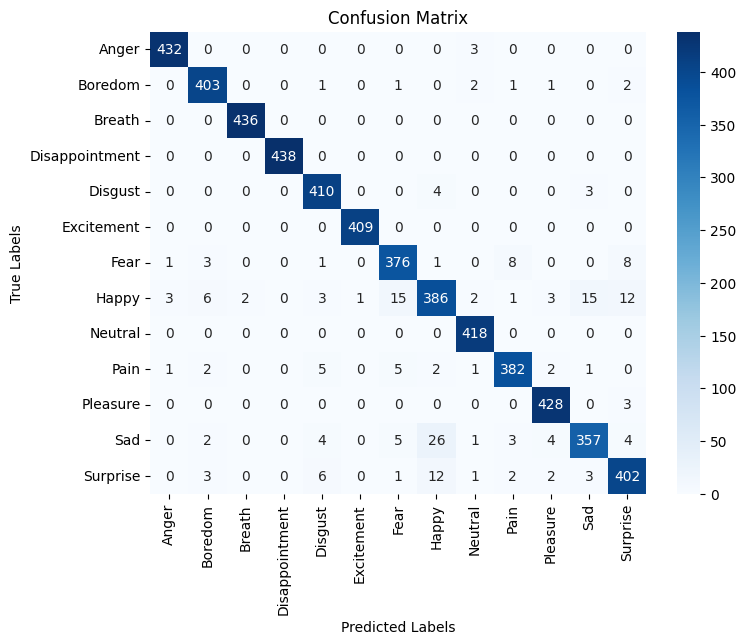

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)
class_report = classification_report(y_test, y_pred_labels)

print("XGBoost Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **DEEP LEARNING**

LSTM

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('balanced_extracted_features.csv')

# Inspect the first few rows to understand the structure
print(data.head())


      mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -228.02501  147.842210 -70.747215  68.790060 -28.227379  32.313810   
1 -319.90155  167.701140 -48.286850  46.100620 -14.900600  22.293093   
2 -393.52457   57.013573 -33.018734  33.840805 -56.194850  16.108864   
3 -271.50842  -10.220695  -0.593648 -21.216953 -36.400450  -3.494889   
4 -209.49080   81.121990 -71.974530  49.814130 -59.801914  13.942583   

      mfcc_6     mfcc_7    mfcc_8    mfcc_9  ...  chroma_3  chroma_4  \
0 -10.003086  -7.403256 -0.674906 -5.756487  ...  0.722635  0.618910   
1   1.392822 -13.227706  3.483710  2.841111  ...  0.592704  0.583074   
2 -26.557451   4.584624  3.596937 -4.936513  ...  0.196284  0.172487   
3   1.195620  -3.094382 -6.202547 -1.421871  ...  0.145059  0.110400   
4 -35.307404  20.319042  2.352706 -5.890118  ...  0.293354  0.222501   

   chroma_5  chroma_6  chroma_7  chroma_8  chroma_9  chroma_10  chroma_11  \
0  0.618261  0.558508  0.537721  0.559678  0.600051   0.6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('balanced_extracted_features.csv')

# Extract features and labels
X = df.drop(columns=['label'])
y = df['label']

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels to numerical format (one-hot encoding)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Reshape X for LSTM input: (samples, time steps, features)
# Assuming each sample is a time step with one feature for simplicity
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y_one_hot, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(y_one_hot.shape[1], activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2859 - loss: 2.1659 - val_accuracy: 0.5081 - val_loss: 1.5675
Epoch 2/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4984 - loss: 1.5584 - val_accuracy: 0.5838 - val_loss: 1.3081
Epoch 3/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5669 - loss: 1.3312 - val_accuracy: 0.6320 - val_loss: 1.1671
Epoch 4/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6250 - loss: 1.1620 - val_accuracy: 0.6804 - val_loss: 1.0413
Epoch 5/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6595 - loss: 1.0526 - val_accuracy: 0.7041 - val_loss: 0.9562
Epoch 6/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6852 - loss: 0.9637 - val_accuracy: 0.7212 - val_loss: 0.8995
Epoch 7/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7124 - loss: 0.8941 - val_accuracy: 0.7406 - val_loss: 0.8544
Epoch 8/60
686/686 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7260 - loss: 0.8368 - val_accuracy: 0.

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
                precision    recall  f1-score   support

         Anger       0.95      0.97      0.96       435
       Boredom       0.92      0.98      0.95       411
        Breath       0.97      1.00      0.99       436
Disappointment       0.99      1.00      0.99       438
       Disgust       0.91      0.93      0.92       417
    Excitement       0.99      1.00      0.99       409
          Fear       0.90      0.89      0.90       398
         Happy       0.86      0.74      0.80       449
       Neutral       0.95      1.00      0.97       418
          Pain       0.89      0.87      0.88       401
      Pleasure       0.96      0.98      0.97       431
           Sad       0.86      0.80      0.83       406
      Surprise       0.85      0.87      0.86       432

      accuracy                           0.93      5481
     macro avg       0.92      0.93      0.92      5481
  weighted avg       0.92      0.93   

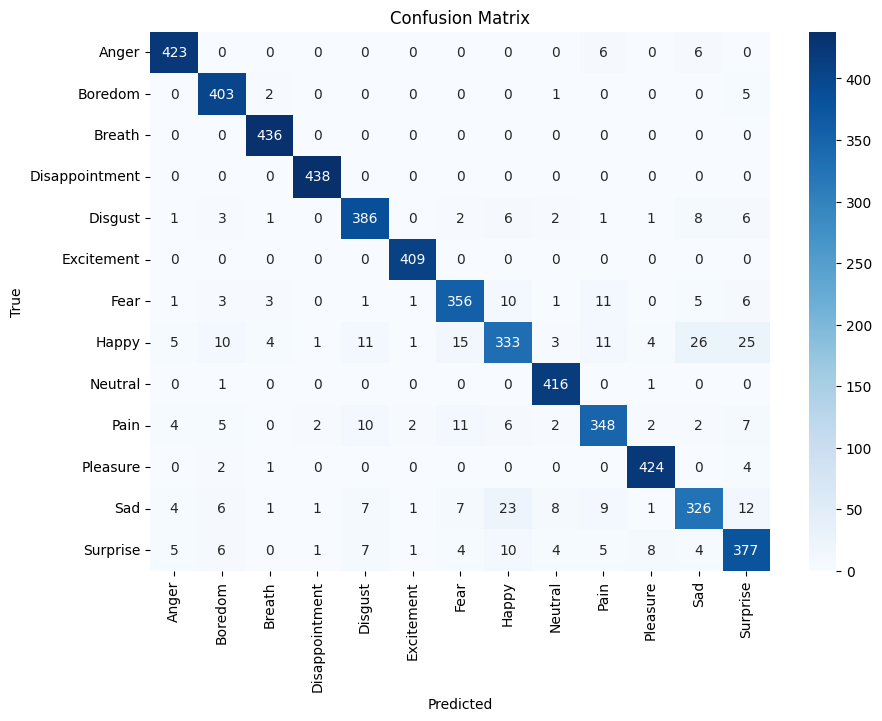

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions on the validation set
y_pred = model.predict(X_val)

# Convert predictions and true labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification Report (precision, recall, f1-score, support)
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


GRU


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1667 - loss: 2.4594 - val_accuracy: 0.3651 - val_loss: 1.9961
Epoch 2/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3061 - loss: 2.0969 - val_accuracy: 0.4174 - val_loss: 1.8191
Epoch 3/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3550 - loss: 1.9602 - val_accuracy: 0.4700 - val_loss: 1.6948
Epoch 4/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3975 - loss: 1.8449 - val_accuracy: 0.5011 - val_loss: 1.6044
Epoch 5/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4333 - loss: 1.7491 - val_accuracy: 0.5371 - val_loss: 1.5190
Epoch 6/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4472 - loss: 1.7061 - val_accuracy: 0.5420 - val_loss: 1.4459
Epoch 7/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4618 - loss: 1.6356 - val_accuracy: 0.5651 - val_loss: 1.3865
Epoch 8/60
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4933 - loss: 1.5672 - val_accuracy: 0.5877 - val_

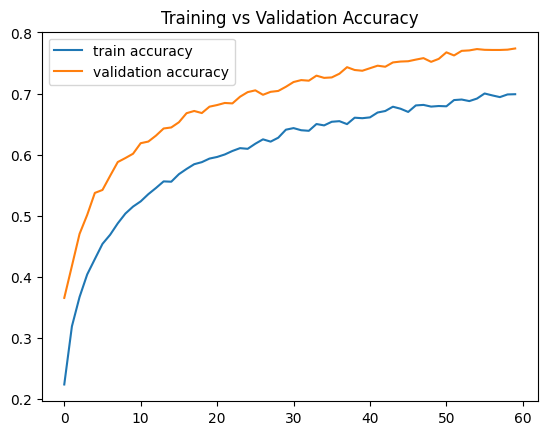

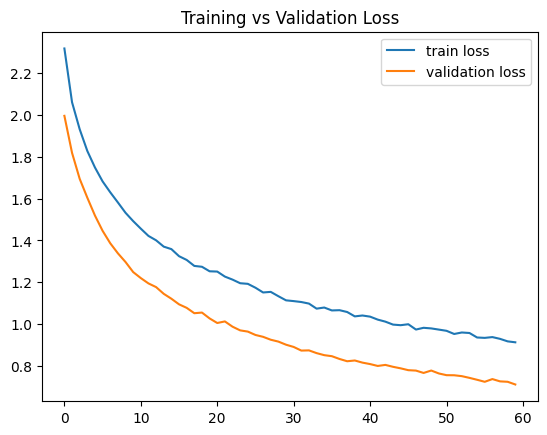

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('balanced_extracted_features.csv')

# Separate the features and labels
X = df.drop(columns=['label'])  # Features (all columns except 'label')
y = df['label']  # Target (emotion labels)

# Label Encoding the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels
y_onehot = to_categorical(y_encoded)

# Normalize the feature set (optional, but recommended for deep learning models)
X = (X - X.mean()) / X.std()

# Reshape X to be 3D for the GRU input (samples, time_steps, features)
# Assuming each sample represents a sequence of features, we can reshape as needed.
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))  # (samples, 1, features)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped, y_onehot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Get the input shape for the GRU model
input_shape = X_train.shape[1], X_train.shape[2]  # (time_steps, num_features)
num_classes = y_train.shape[1]  # Number of unique emotions in the labels

# Define the GRU model
def create_gru_model(input_shape, num_classes):
    model = Sequential()

    # GRU Layer
    model.add(GRU(128, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dropout(0.5))

    # Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
gru_model = create_gru_model(input_shape, num_classes)

# Train the model
history = gru_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = gru_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# If you want to visualize accuracy and loss over epochs:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.1506 - loss: 2.4724 - val_accuracy: 0.3277 - val_loss: 2.0409 - learning_rate: 0.0010
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.2791 - loss: 2.1592 - val_accuracy: 0.4053 - val_loss: 1.8838 - learning_rate: 0.0010
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3408 - loss: 2.0215 - val_accuracy: 0.4393 - val_loss: 1.7741 - learning_rate: 0.0010
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3734 - loss: 1.9125 - val_accuracy: 0.4690 - val_loss: 1.6817 - learning_rate: 0.0010
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4054 - loss: 1.8202 - val_accuracy: 0.5094 - val_loss: 1.5733 - learning_rate: 0.0010
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4279 - loss: 1.7485 - val_accuracy: 0.5227 - val_loss: 1.5051 - learning_rate: 0.0010
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4508 - los

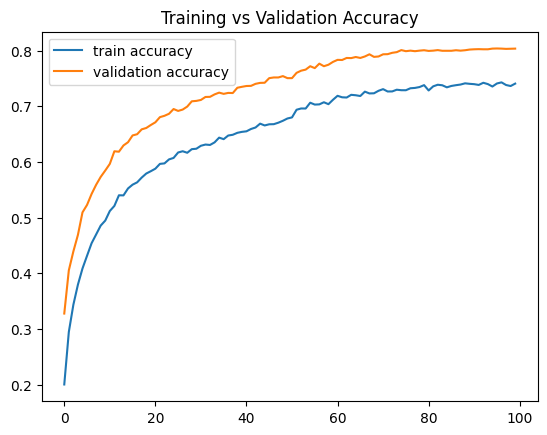

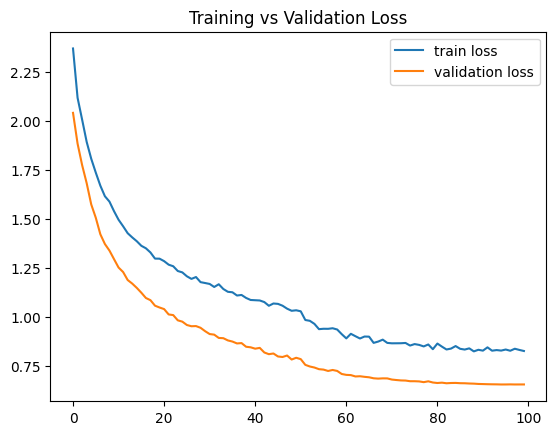

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the improved GRU model with more layers, dropout, and regularization
def create_improved_gru_model(input_shape, num_classes):
    model = Sequential()

    # Stacked GRU Layer with Bidirectional
    model.add(GRU(128, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))

    model.add(GRU(128, activation='relu', return_sequences=False))
    model.add(Dropout(0.5))

    # Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification

    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the improved model
gru_improved_model = create_improved_gru_model(input_shape, num_classes)

# Implement EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the improved model
history_improved = gru_improved_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                                          callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss_improved, test_acc_improved = gru_improved_model.evaluate(X_test, y_test)
print(f"Improved Test Accuracy: {test_acc_improved:.4f}, Test Loss: {test_loss_improved:.4f}")

# Visualizing the results
plt.plot(history_improved.history['accuracy'], label='train accuracy')
plt.plot(history_improved.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history_improved.history['loss'], label='train loss')
plt.plot(history_improved.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = gru_improved_model.predict(X_test)

# Convert predicted probabilities to class labels (since it's multi-class)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, you need to get the class labels from it as well
y_true = np.argmax(y_test, axis=1)

#print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
                 precision    recall  f1-score   support

         Anger       0.81      0.91      0.86       307
       Boredom       0.81      0.82      0.81       306
        Breath       0.96      0.99      0.98       320
Disappointment       1.00      1.00      1.00       323
       Disgust       0.61      0.72      0.66       297
    Excitement       1.00      0.98      0.99       327
          Fear       0.86      0.72      0.78       314
         Happy       0.69      0.68      0.69       347
       Neutral       0.80      0.94      0.87       339
          Pain       0.61      0.52      0.56       291
      Pleasure       0.88      0.87      0.87       327
           Sad       0.82      0.71      0.76       294
      Surprise       0.68      0.65      0.67       319

      accuracy                           0.81      4111
     macro avg       0.81      0.81      0.81      4111
  weighted avg       0.81      0.81  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.1702 - loss: 2.4254 - val_accuracy: 0.3566 - val_loss: 1.9770 - learning_rate: 0.0010
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.3110 - loss: 2.0608 - val_accuracy: 0.4417 - val_loss: 1.7863 - learning_rate: 0.0010
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.3779 - loss: 1.9034 - val_accuracy: 0.5030 - val_loss: 1.6178 - learning_rate: 0.0010
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.4253 - loss: 1.7740 - val_accuracy: 0.5390 - val_loss: 1.4715 - learning_rate: 0.0010
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4661 - loss: 1.6548 - val_accuracy: 0.5677 - val_loss: 1.3780 - learning_rate: 0.0010
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4981 - loss: 1.5533 - val_accuracy: 0.5921 - val_loss: 1.2889 - learning_rate: 0.0010
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5

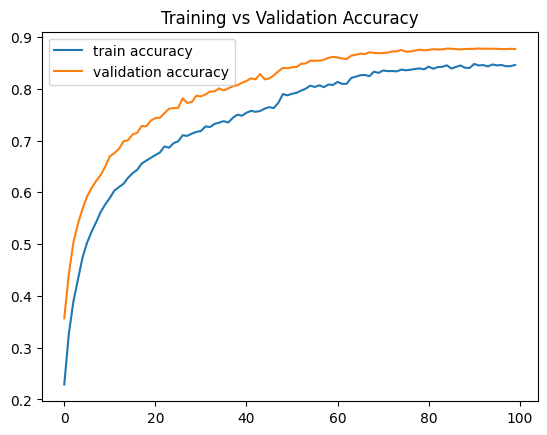

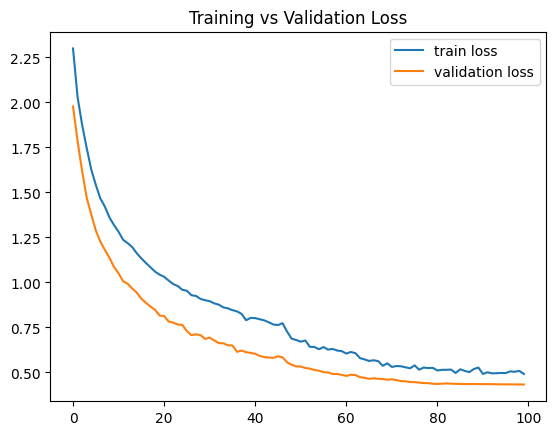

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define the improved Bi-GRU model with more layers, dropout, and regularization
def create_improved_bi_gru_model(input_shape, num_classes):
    model = Sequential()

    # First Bi-GRU Layer
    model.add(Bidirectional(GRU(128, activation='relu', return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.5))

    # Second Bi-GRU Layer
    model.add(Bidirectional(GRU(128, activation='relu', return_sequences=False)))
    model.add(Dropout(0.5))

    # Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification

    # Compile the model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the improved Bi-GRU model
gru_improved_model = create_improved_bi_gru_model(input_shape, num_classes)

# Implement EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7)

# Train the improved model
history_improved = gru_improved_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
                                          callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss_improved, test_acc_improved = gru_improved_model.evaluate(X_test, y_test)
print(f"Improved Test Accuracy: {test_acc_improved:.4f}, Test Loss: {test_loss_improved:.4f}")

# Visualizing the results
plt.plot(history_improved.history['accuracy'], label='train accuracy')
plt.plot(history_improved.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history_improved.history['loss'], label='train loss')
plt.plot(history_improved.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
                 precision    recall  f1-score   support

         Anger       0.93      0.93      0.93       307
       Boredom       0.88      0.89      0.88       306
        Breath       0.98      1.00      0.99       320
Disappointment       1.00      1.00      1.00       323
       Disgust       0.72      0.86      0.78       297
    Excitement       1.00      1.00      1.00       327
          Fear       0.88      0.79      0.83       314
         Happy       0.80      0.77      0.79       347
       Neutral       0.94      0.97      0.96       339
          Pain       0.73      0.68      0.71       291
      Pleasure       0.95      0.94      0.95       327
           Sad       0.83      0.78      0.81       294
      Surprise       0.76      0.79      0.77       319

      accuracy                           0.88      4111
     macro avg       0.88      0.88      0.88      4111
  weighted avg       0.88      0.88  

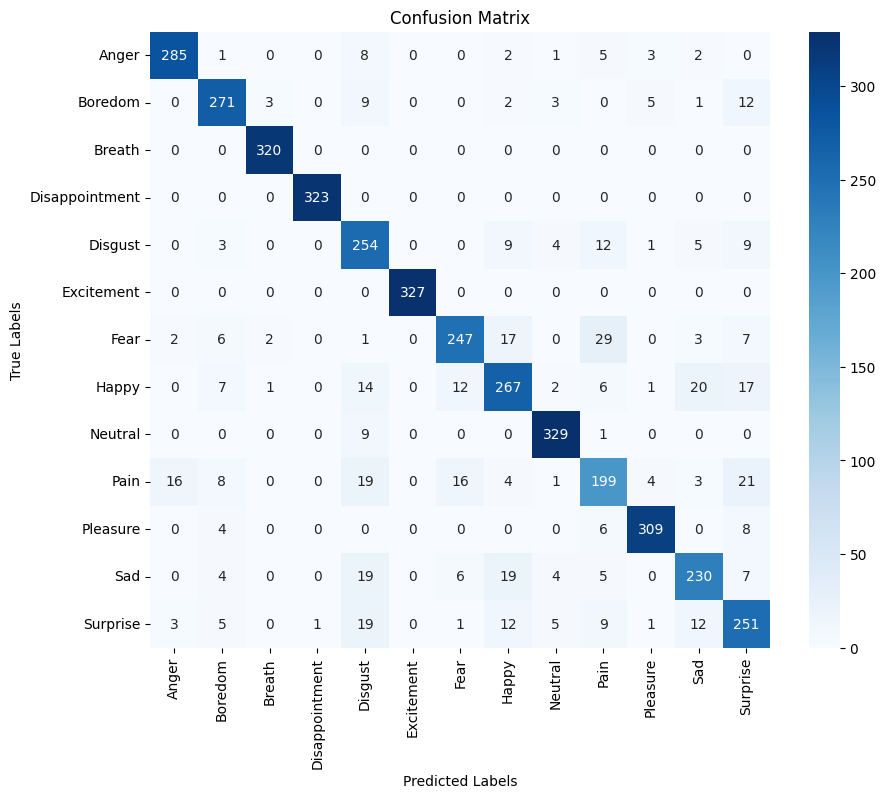

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = gru_improved_model.predict(X_test)

# Convert predicted probabilities to class labels (since it's multi-class)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded, you need to get the class labels from it as well
y_true = np.argmax(y_test, axis=1)

#print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('balanced_extracted_features.csv')

# Inspect the first few rows
print("Dataset Sample:")
print(data.head())

# Assuming the last column is the target (update if necessary)
target_column = data.columns[-1]

# Separate features (X) and labels (y)
X = data.drop(columns=[target_column]).values
y = data[target_column].values

# Encode the labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize features using StandardScaler (optional but recommended)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of the datasets
print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
print(f"Testing set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

# Check unique labels (if encoded)
print("Encoded Labels:", label_encoder.classes_)


Dataset Sample:
      mfcc_0      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
0 -228.02501  147.842210 -70.747215  68.790060 -28.227379  32.313810   
1 -319.90155  167.701140 -48.286850  46.100620 -14.900600  22.293093   
2 -393.52457   57.013573 -33.018734  33.840805 -56.194850  16.108864   
3 -271.50842  -10.220695  -0.593648 -21.216953 -36.400450  -3.494889   
4 -209.49080   81.121990 -71.974530  49.814130 -59.801914  13.942583   

      mfcc_6     mfcc_7    mfcc_8    mfcc_9  ...  chroma_3  chroma_4  \
0 -10.003086  -7.403256 -0.674906 -5.756487  ...  0.722635  0.618910   
1   1.392822 -13.227706  3.483710  2.841111  ...  0.592704  0.583074   
2 -26.557451   4.584624  3.596937 -4.936513  ...  0.196284  0.172487   
3   1.195620  -3.094382 -6.202547 -1.421871  ...  0.145059  0.110400   
4 -35.307404  20.319042  2.352706 -5.890118  ...  0.293354  0.222501   

   chroma_5  chroma_6  chroma_7  chroma_8  chroma_9  chroma_10  chroma_11  \
0  0.618261  0.558508  0.537721  0.559678

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.08      0.27      0.12       334
           1       0.00      0.00      0.00       327
           2       0.04      0.07      0.05       323
           3       0.00      0.00      0.00       331
           4       0.00      0.00      0.00       334
           5       0.12      0.05      0.07       282
           6       0.05      0.04      0.04       314
           7       0.00      0.00      0.00       324
           8       0.00      0.00      0.00       289
           9       0.17      0.06      0.09       310
          10       0.08      0.01      0.01       296
          11       0.07      0.42      0.12       309
          12       0.03      0.00      0.01       338

    accuracy                           0.07      4111
   macro avg       0.05      0.07      0.04      4111
weighted avg       0.05      0.07      0.04      4111

Confusion Matrix (Validation):
[[ 89   3  5

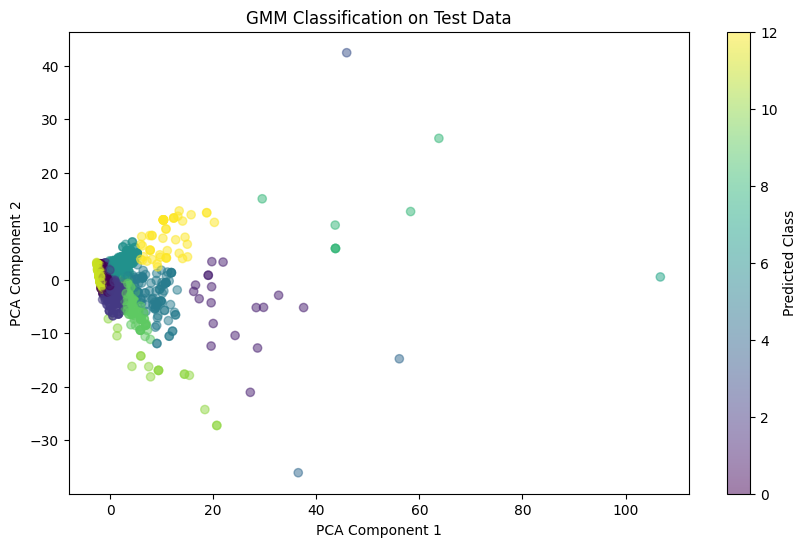

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Flatten the data
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_val_flatten = X_val.reshape(X_val.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flatten)
X_val_scaled = scaler.transform(X_val_flatten)
X_test_scaled = scaler.transform(X_test_flatten)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=13, covariance_type='full', random_state=42)
gmm.fit(X_train_pca)

# Predict probabilities for validation and test sets
y_val_proba = gmm.predict_proba(X_val_pca)
y_test_proba = gmm.predict_proba(X_test_pca)

# Convert probabilities to class predictions
y_val_pred = np.argmax(y_val_proba, axis=1)
y_test_pred = np.argmax(y_test_proba, axis=1)

# If labels are one-hot encoded, convert them to class labels (optional)
# Assuming y_train, y_val, y_test are already class labels

# Evaluate the GMM model on validation data
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix (Validation):")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate the GMM model on test data
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Visualize the GMM clusters on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pred, cmap='viridis', alpha=0.5)
plt.title("GMM Classification on Test Data")
plt.colorbar(label='Predicted Class')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()